# Тюнинг линейной регрессии и ошибки

### О задании

В этом задании вы:
- обучите линейную регрессию, познакомитесь с метриками качества в задачах регресии

In [72]:
%pylab inline
import pandas as pd

from sklearn.base import BaseEstimator
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Часть 1. Линейная регрессия

Для начала загрузим данные и разделим их на обучающую и тестовую выборки в соотношении 7 к 3. Зачем так делать? Когда вы проверяете себя на данных на которых не обучались, вы можете быть уверены что не переобучились. Таким образом если качество на 70% датасета (оубчающей выборке) растёт, а на тестовой выборке падает, то модель начала запоминать датасет (переобучилась), вы что-то делаете не так.


In [73]:
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=241)

__Задание 1.__ Обучение линейной регрессии.

**(4 балла)**

Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$).

Спойлер - при большом гиперпараметре регуляризации все параметры стремятся к нулю. На графике это должно быть видно.

In [74]:
from sklearn import datasets, linear_model
from sklearn.linear_model import Ridge, Lasso
import numpy as np
from sklearn.preprocessing import StandardScaler

In [75]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler


data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=241)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


lasso = Lasso()
ridge = Ridge()

lasso.fit(X_train_scaled, y_train)
ridge.fit(X_train_scaled, y_train)


lasso_coef = lasso.coef_
ridge_coef = ridge.coef_

print('Коэффициенты Lasso:', lasso_coef)
print('Коэффициенты Ridge:', ridge_coef)

n = 0.01  

lasso_0 = np.sum(np.abs(lasso_coef) < n)
ridge_0 = np.sum(np.abs(ridge_coef) < n)

print('Порог близости к нулю:', n)
print('Lasso - коэффициентов близких к нулю:', lasso_0, 'из', len(lasso_coef))
print('Ridge - коэффициентов близких к нулю:', ridge_0, 'из', len(ridge_coef))



Коэффициенты Lasso: [ -0.87959939 -10.62479754  18.66769543  15.95212993  -3.65184529
  -0.          -9.47563486   6.11526913  26.76775341   3.47215614]
Коэффициенты Ridge: [ -2.07915418 -12.5050054   18.56120212  17.53370828 -30.78636928
  18.96016624   3.61559523  13.55452165  36.15592989   4.28183398]
Порог близости к нулю: 0.01
Lasso - коэффициентов близких к нулю: 1 из 10
Ridge - коэффициентов близких к нулю: 0 из 10


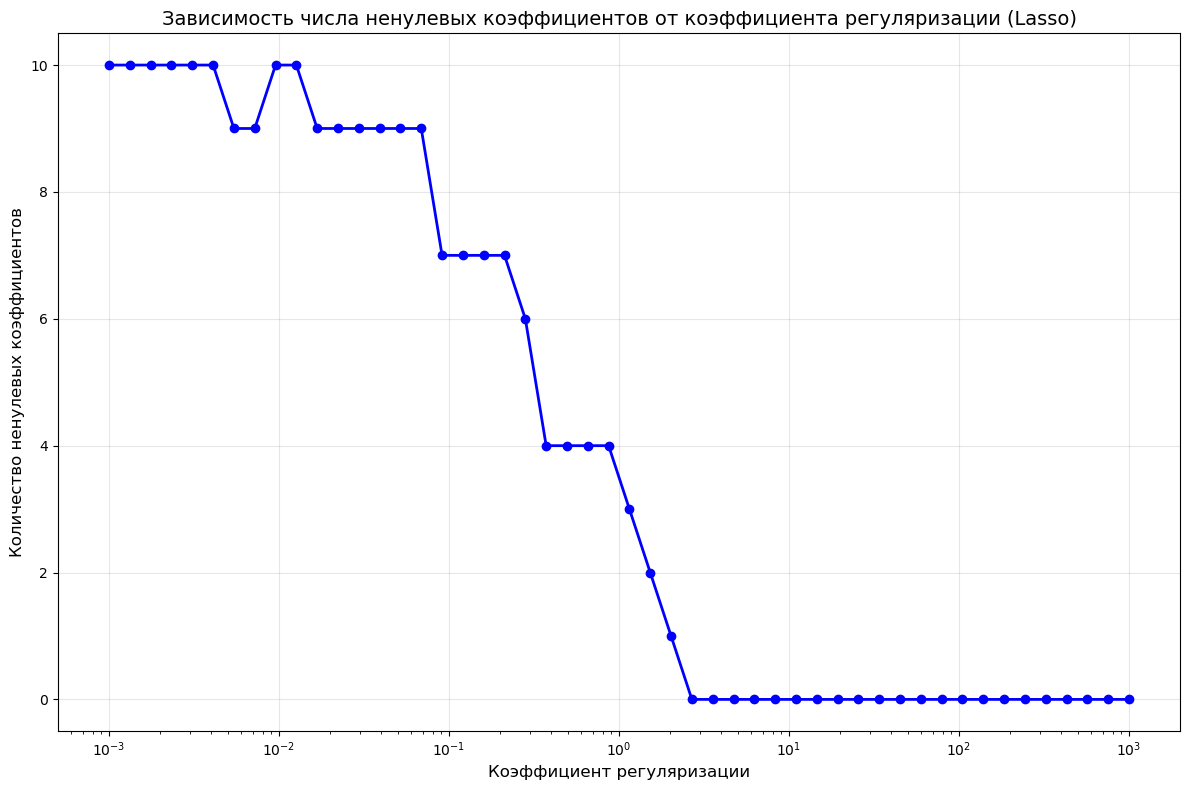

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso



data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=241)




alphas = np.logspace(-3, 3, 50)
non_0_counts = []


for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    
   
    non_0_count = np.sum(np.abs(lasso.coef_) > 0.01)
    non_0_counts.append(non_0_count)


plt.figure(figsize=(12, 8))
plt.semilogx(alphas, non_0_counts, 'bo-', linewidth=2, markersize=6)
plt.xlabel('Коэффициент регуляризации', fontsize=12)
plt.ylabel('Количество ненулевых коэффициентов', fontsize=12)
plt.title('Зависимость числа ненулевых коэффициентов от коэффициента регуляризации (Lasso)', fontsize=14)
plt.grid(True, alpha=0.3)



plt.tight_layout()
plt.show()


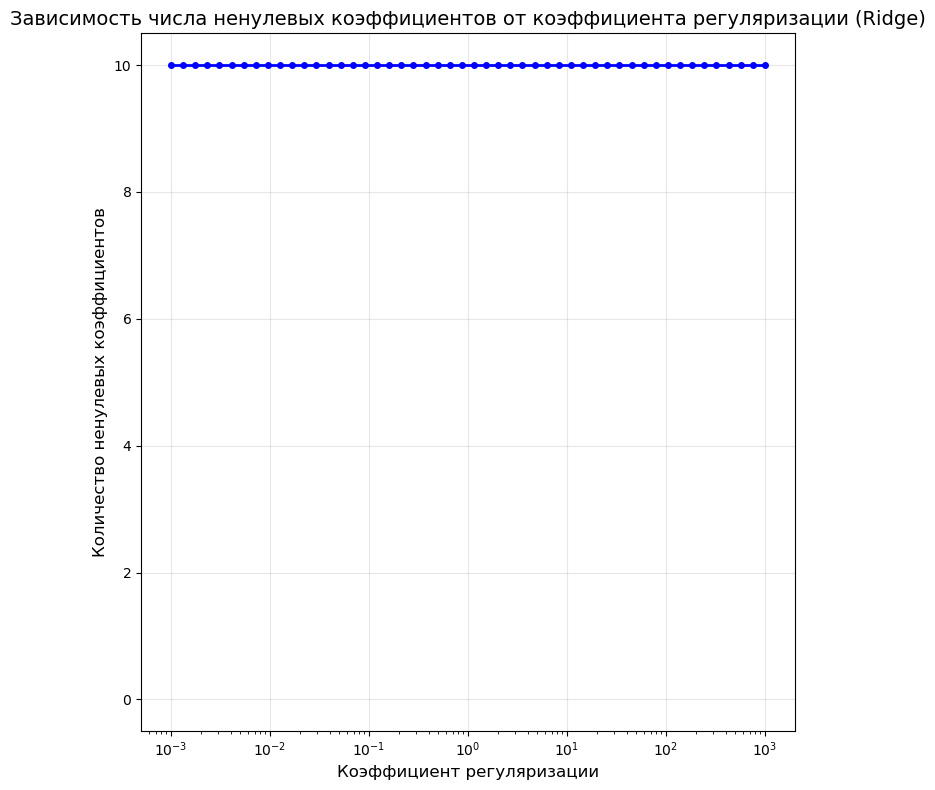

In [77]:

non_0_counts = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    
   
    non_0_count = np.sum(np.abs(ridge.coef_) > 0.01)
    non_0_counts.append(non_0_count) 


plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 2)
plt.semilogx(alphas, non_0_counts, 'bo-', linewidth=2, markersize=4, label='Ridge')
plt.xlabel('Коэффициент регуляризации', fontsize=12)
plt.ylabel('Количество ненулевых коэффициентов', fontsize=12)
plt.title('Зависимость числа ненулевых коэффициентов от коэффициента регуляризации (Ridge)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.ylim(-0.5, 10.5)

plt.tight_layout()
plt.show()

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [78]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [79]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=241)


ridge = Ridge()


rmse = np.sqrt(-cross_val_score(ridge, X_train, y_train, 
                                      scoring='neg_mean_squared_error', cv=5))
mae = -cross_val_score(ridge, X_train, y_train, 
                             scoring='neg_mean_absolute_error', cv=5)
r2 = cross_val_score(ridge, X_train, y_train, 
                           scoring='r2', cv=5)

print('Средние метрики по фолдам кросс-валидации:')
print('RMSE:', round(rmse.mean(), 4))
print('MAE:', round(mae.mean(), 4))
print('R^2:', round(r2.mean(), 4))


Средние метрики по фолдам кросс-валидации:
RMSE: 59.9231
MAE: 50.0856
R^2: 0.4136


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

Лучший alpha по RMSE: 0.0023 RMSE: 7.41
Лучший alpha по MAE: 0.0013 MAE: 43.4788
Лучший alpha по R^2: 0.0023 R^2: 0.5059


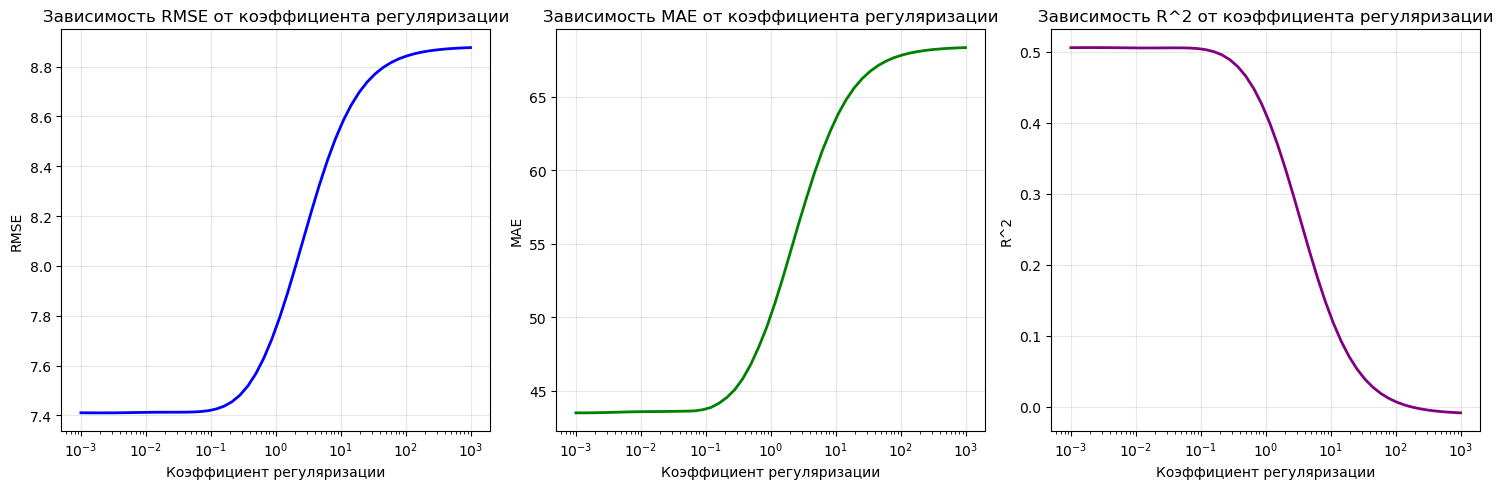

СРАВНЕНИЕ КАЧЕСТВА
Метрика Alpha=1.0 Alpha=лучший Изменение
RMSE 58.3043 55.8125 +2.4918
MAE 49.6028 47.1154 +2.4874
R^2 0.3599 0.4134 +0.0535


In [85]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, 
                                                    train_size=0.7, random_state=241)


alphas = np.logspace(-3, 3, 50)


rmse_scores = []
mae_scores = []
r2_scores = []


best_alpha_rmse = 0
best_alpha_mae = 0
best_alpha_r2 = 0
best_rmse = float('inf')
best_mae = float('inf')
best_r2 = -float('inf')


for alpha in alphas:
    
    ridge = Ridge(alpha=alpha)

    rmse = np.sqrt(np.sqrt(-cross_val_score(ridge, X_train, y_train, 
                                      scoring='neg_mean_squared_error', cv=5).mean()))
    mae = -cross_val_score(ridge, X_train, y_train, 
                             scoring='neg_mean_absolute_error', cv=5).mean()
    r2 = cross_val_score(ridge, X_train, y_train, 
                           scoring='r2', cv=5).mean()
    
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    
    
    if rmse < best_rmse:
        best_rmse = rmse
        best_alpha_rmse = alpha
    if mae < best_mae:
        best_mae = mae
        best_alpha_mae = alpha
        
    if r2 > best_r2:
        best_r2 = r2
        best_alpha_r2 = alpha

print('Лучший alpha по RMSE:', round(best_alpha_rmse, 4), 'RMSE:', round(best_rmse, 4))
print('Лучший alpha по MAE:', round(best_alpha_mae, 4), 'MAE:', round(best_mae, 4))
print('Лучший alpha по R^2:', round(best_alpha_r2, 4), 'R^2:', round(best_r2, 4))


plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
plt.semilogx(alphas, rmse_scores, 'b-', linewidth=2)
plt.xlabel('Коэффициент регуляризации')
plt.ylabel('RMSE')
plt.title('Зависимость RMSE от коэффициента регуляризации')
plt.grid(True, alpha=0.3)



plt.subplot(1, 3, 2)
plt.semilogx(alphas, mae_scores, 'g-', linewidth=2)
plt.xlabel('Коэффициент регуляризации')
plt.ylabel('MAE')
plt.title('Зависимость MAE от коэффициента регуляризации')
plt.grid(True, alpha=0.3)



plt.subplot(1, 3, 3)
plt.semilogx(alphas, r2_scores, 'purple', linewidth=2)
plt.xlabel('Коэффициент регуляризации')
plt.ylabel('R^2')
plt.title('Зависимость R^2 от коэффициента регуляризации')
plt.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()


print("СРАВНЕНИЕ КАЧЕСТВА")


ridge_default = Ridge()
ridge_default.fit(X_train, y_train)
y_pred_default = ridge_default.predict(X_test)


ridge_best = Ridge(alpha=best_alpha_r2)
ridge_best.fit(X_train, y_train)
y_pred_best = ridge_best.predict(X_test)


metrics_default = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_default)),
    'MAE': mean_absolute_error(y_test, y_pred_default),
    'R^2': r2_score(y_test, y_pred_default)
}

metrics_best = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_best)),
    'MAE': mean_absolute_error(y_test, y_pred_best),
    'R^2': r2_score(y_test, y_pred_best)
}


print('Метрика', 'Alpha=1.0', 'Alpha=лучший', 'Изменение')

for metric in ['RMSE', 'MAE', 'R^2']:
    default_val = metrics_default[metric]
    best_val = metrics_best[metric]
    
    if metric in ['RMSE', 'MAE']:
        change = default_val - best_val
        change_str = '+' + str(round(change, 4))
    else:
        change = best_val - default_val
        change_str = '+' + str(round(change, 4))
    
    print(metric, round(default_val, 4), round(best_val, 4), change_str)



__Задание 2.__ Поиск объектов-выбросов

**(4 балла)**

Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

MSE: 55.919069866196416


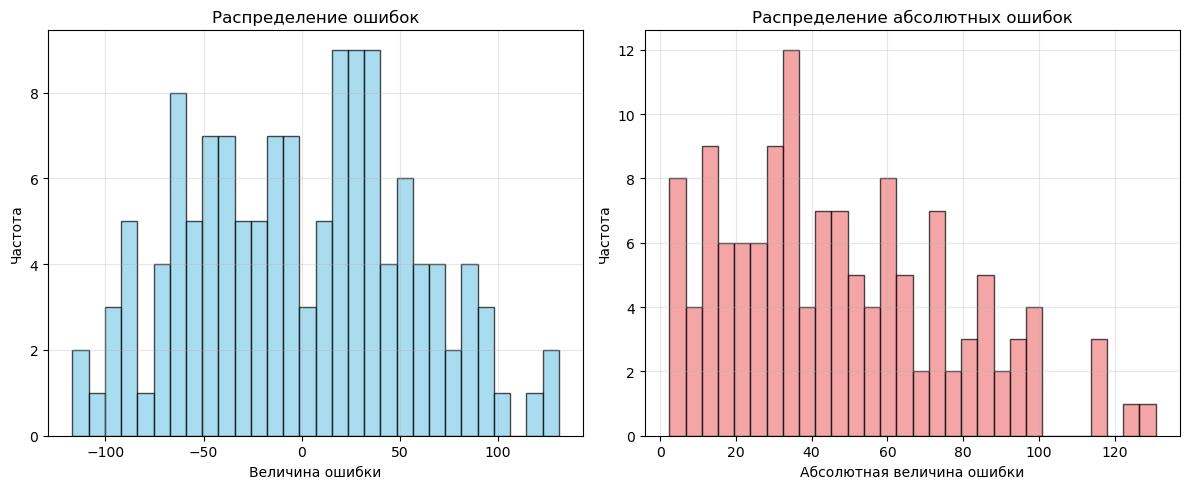

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=241)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


errors = y_test - y_pred
mse = np.sqrt(mean_squared_error(y_test, y_pred))

print('MSE:', mse)



plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(errors, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Величина ошибки')
plt.ylabel('Частота')
plt.title('Распределение ошибок')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(np.abs(errors), bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
plt.xlabel('Абсолютная величина ошибки')
plt.ylabel('Частота')
plt.title('Распределение абсолютных ошибок')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()




Попробуйте удалить объекты-выбросы из обучающей выборки (что считать или не считать выбросами на ваше усмотрение). Обучите модель заново и посмотрите на качество на отложенной выборке (учитывайте, что там тоже могут быть выбросы, с которыми вы ничего не можете сделать). Стало ли лучше? Чем вы можете объяснить это?

Удаленный процент объектов: 9.71 %
MSE: 3126.94 -> 3148.71 (УХУДШЕНИЕ)
MAE: 47.20 -> 47.22 (УХУДШЕНИЕ)
R^2:  0.411 -> 0.407 (УХУДШЕНИЕ)


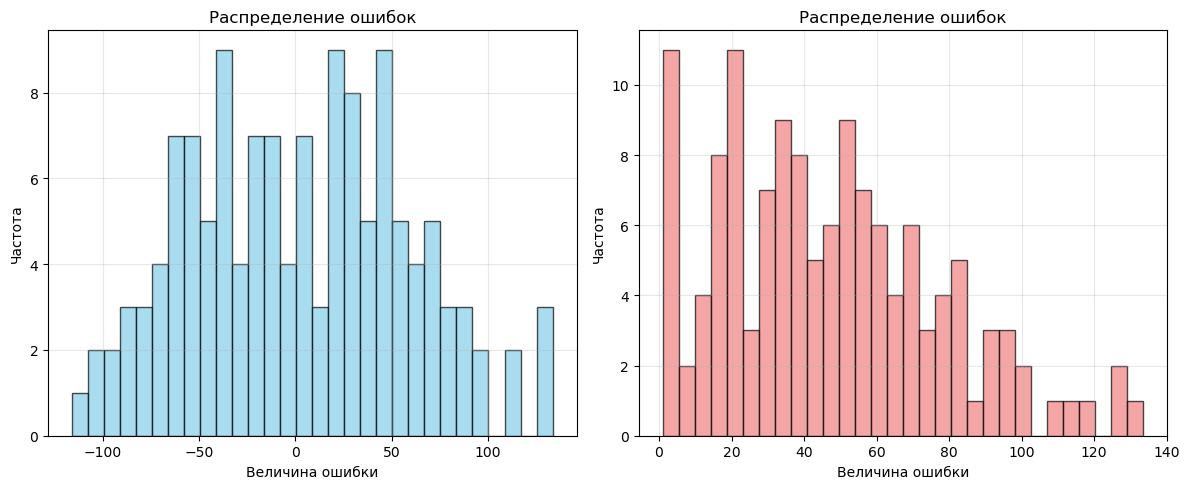

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=241)


def remove_outliers(X, y):
    
    lower_bound = np.percentile(y, 5)
    upper_bound = np.percentile(y, 95)
    mask = (y >= lower_bound) & (y <= upper_bound)
    
    return X[mask], y[mask]


model_original = LinearRegression()
model_original.fit(X_train, y_train)
y_pred_original = model_original.predict(X_test)



results = {}

    
    
X_train_clean, y_train_clean = remove_outliers(X_train, y_train)
removed_count = len(y_train) - len(y_train_clean)
print('Удаленный процент объектов:', round(removed_count/len(y_train)*100, 2), '%')
    
    
model_clean = LinearRegression()
model_clean.fit(X_train_clean, y_train_clean)
y_pred_clean = model_clean.predict(X_test)
    
    
mse_original = mean_squared_error(y_test, y_pred_original)
mse_clean = mean_squared_error(y_test, y_pred_clean)
    
mae_original = mean_absolute_error(y_test, y_pred_original)
mae_clean = mean_absolute_error(y_test, y_pred_clean)
    
r2_original = r2_score(y_test, y_pred_original)
r2_clean = r2_score(y_test, y_pred_clean)

errors = y_test - y_pred_clean


    
print(f"MSE: {mse_original:.2f} -> {mse_clean:.2f} ({'УЛУЧШЕНИЕ' if mse_clean < mse_original else 'УХУДШЕНИЕ'})")
print(f"MAE: {mae_original:.2f} -> {mae_clean:.2f} ({'УЛУЧШЕНИЕ' if mae_clean < mae_original else 'УХУДШЕНИЕ'})")
print(f"R^2:  {r2_original:.3f} -> {r2_clean:.3f} ({'УЛУЧШЕНИЕ' if r2_clean > r2_original else 'УХУДШЕНИЕ'})")

results = {
    'model': model_clean,
    'mse': mse_clean,
    'mae': mae_clean,
    'r2': r2_clean,
    'removed_count': removed_count
}



plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(errors, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Величина ошибки')
plt.ylabel('Частота')
plt.title('Распределение ошибок')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(np.abs(errors), bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
plt.xlabel('Величина ошибки')
plt.ylabel('Частота')
plt.title('Распределение ошибок')
plt.grid(True, alpha=0.3)




plt.tight_layout()
plt.show()




__Задание 3.__ Отчёт

**(2 балла)**

Подбор наилучшего коээфициента регуляризации хоть и улучшил результат, но не сильно, это видно по rmse, mae и r^2.
На гистограмме абсолютных и не абсолюнытх ошибок , видно, что частота сгущается около нуля.
Удаление объектов привело к небольшому ухудшению результата, это можно обосновать тем, что модель обученная на очищенных данных, плохо обобщается на реальных данных с выбросами.